In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from funs import *

In [6]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

In [7]:
df = pd.read_csv('../data/df_train.csv')
df_test = pd.read_csv('../data/df_test.csv')

### Najpierw wybieramy tylko niektóre kolumny

In [8]:
columns_to_drop = ["Area", "MinorAxisLength", "MajorAxisLength", "ConvexArea", "EquivDiameter"]
df = df.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)


### Zamieniamy outliery

In [9]:
X = df.copy()

mean = X.mean()
std = X.std()
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
outliers = (X < lower) | (X > upper)
X = X.where(~outliers, mean, axis=1)

X_train = X.drop(columns=["Class"])
y_train = X["Class"]
X_test = df_test.drop(columns=["Class"])
y_test = df_test["Class"]

C:\Users\Tomek\AppData\Local\Temp\ipykernel_28616\557398690.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = X.mean()
C:\Users\Tomek\AppData\Local\Temp\ipykernel_28616\557398690.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = X.std()
C:\Users\Tomek\AppData\Local\Temp\ipykernel_28616\557398690.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=80, criterion='entropy', max_depth=20, random_state=311, max_features=None,
                             warm_start=True)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(estimator=rfc)

param_grid = {"n_estimators": [5, 20, 50, 100, 500], "learning_rate": [0.1, 0.2, 0.5, 1],
              "algorithm": ['SAMME']}

grid_search = GridSearchCV(ada, param_grid=param_grid, cv=7, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                                           max_depth=20,
                                                                           max_features=None,
                                                                           n_estimators=80,
                                                                           random_state=311,
                                                                           warm_start=True)),
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [0.1, 0.2, 0.5, 1],
                         'n_estimators': [5, 20, 50, 100, 500]},
             return_train_score=True, scoring='accuracy')

In [38]:
final_ada = grid_search.best_estimator_
final_ada

AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=20,
                                                    max_features=None,
                                                    n_estimators=80,
                                                    random_state=311,
                                                    warm_start=True),
                   learning_rate=0.1, n_estimators=500)

## Testowanie modelu

### ADA with Random Forest

0.9223504721930745
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.92      0.92       278
      BOMBAY       0.99      1.00      1.00       109
        CALI       0.94      0.94      0.94       342
    DERMASON       0.91      0.93      0.92       745
       HOROZ       0.95      0.93      0.94       405
       SEKER       0.95      0.94      0.94       426
        SIRA       0.88      0.87      0.87       554

    accuracy                           0.92      2859
   macro avg       0.93      0.93      0.93      2859
weighted avg       0.92      0.92      0.92      2859



<Figure size 1500x1500 with 0 Axes>

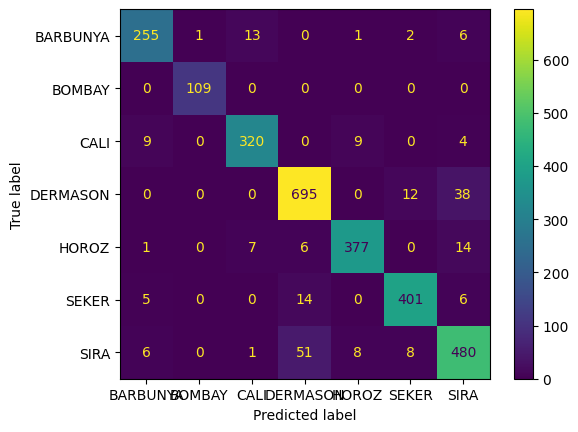

In [50]:
final_ada.fit(X_train, y_train)
y_pred = final_ada.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=final_ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_ada.classes_)
disp.plot()